## EfficientNetV2 Large - Min exposures

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [4]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")

#t = pd.DataFrame()
#for i in range(0,10):
#    ti = pd.read_csv("preds_"+str(i)+".csv")
#    t[str(i)] = ti[str(i)].values
    
#t.to_csv("predsi.csv", index=False)
  
print("Accuracy score pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
  aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))


Accuracy score pr fold
0.7242718446601941, 0.6970873786407767, 0.7145631067961165, 0.7067961165048544, 0.7126213592233009, 
0.7126213592233009, 0.7087378640776699, 0.6990291262135923, 0.7106796116504854, 0.7048543689320388, 
MSE pr fold
0.2674208646663274, 0.31608880593074834, 0.26901166740015486, 0.2701677047565389, 0.3216538924824619, 
0.3324248164002885, 0.2797509250788391, 0.3074799893214847, 0.30339519040486523, 0.29887041794538804, 
aggregate accuracy, mse
0.7203883495145631 0.27984743881004925


In [ ]:
Accuracy score pr fold
0.6970873786407767, 0.7339805825242719, 0.6912621359223301, 0.6699029126213593, 0.7184466019417476, 
0.6990291262135923, 0.7262135922330097, 0.6815533980582524, 0.7048543689320388, 0.7029126213592233, 
MSE pr fold
0.30097150575771525, 0.28132935946744175, 0.29904481883102846, 0.3176863822144107, 0.28227414303887455, 
0.3049059022718125, 0.2796412552907852, 0.33390750726134205, 0.2998588231157967, 0.31008770317437595, 
aggregate accuracy, mse
0.7184466019417476 0.27972858674427004

### Boxplot of prediction pr age class

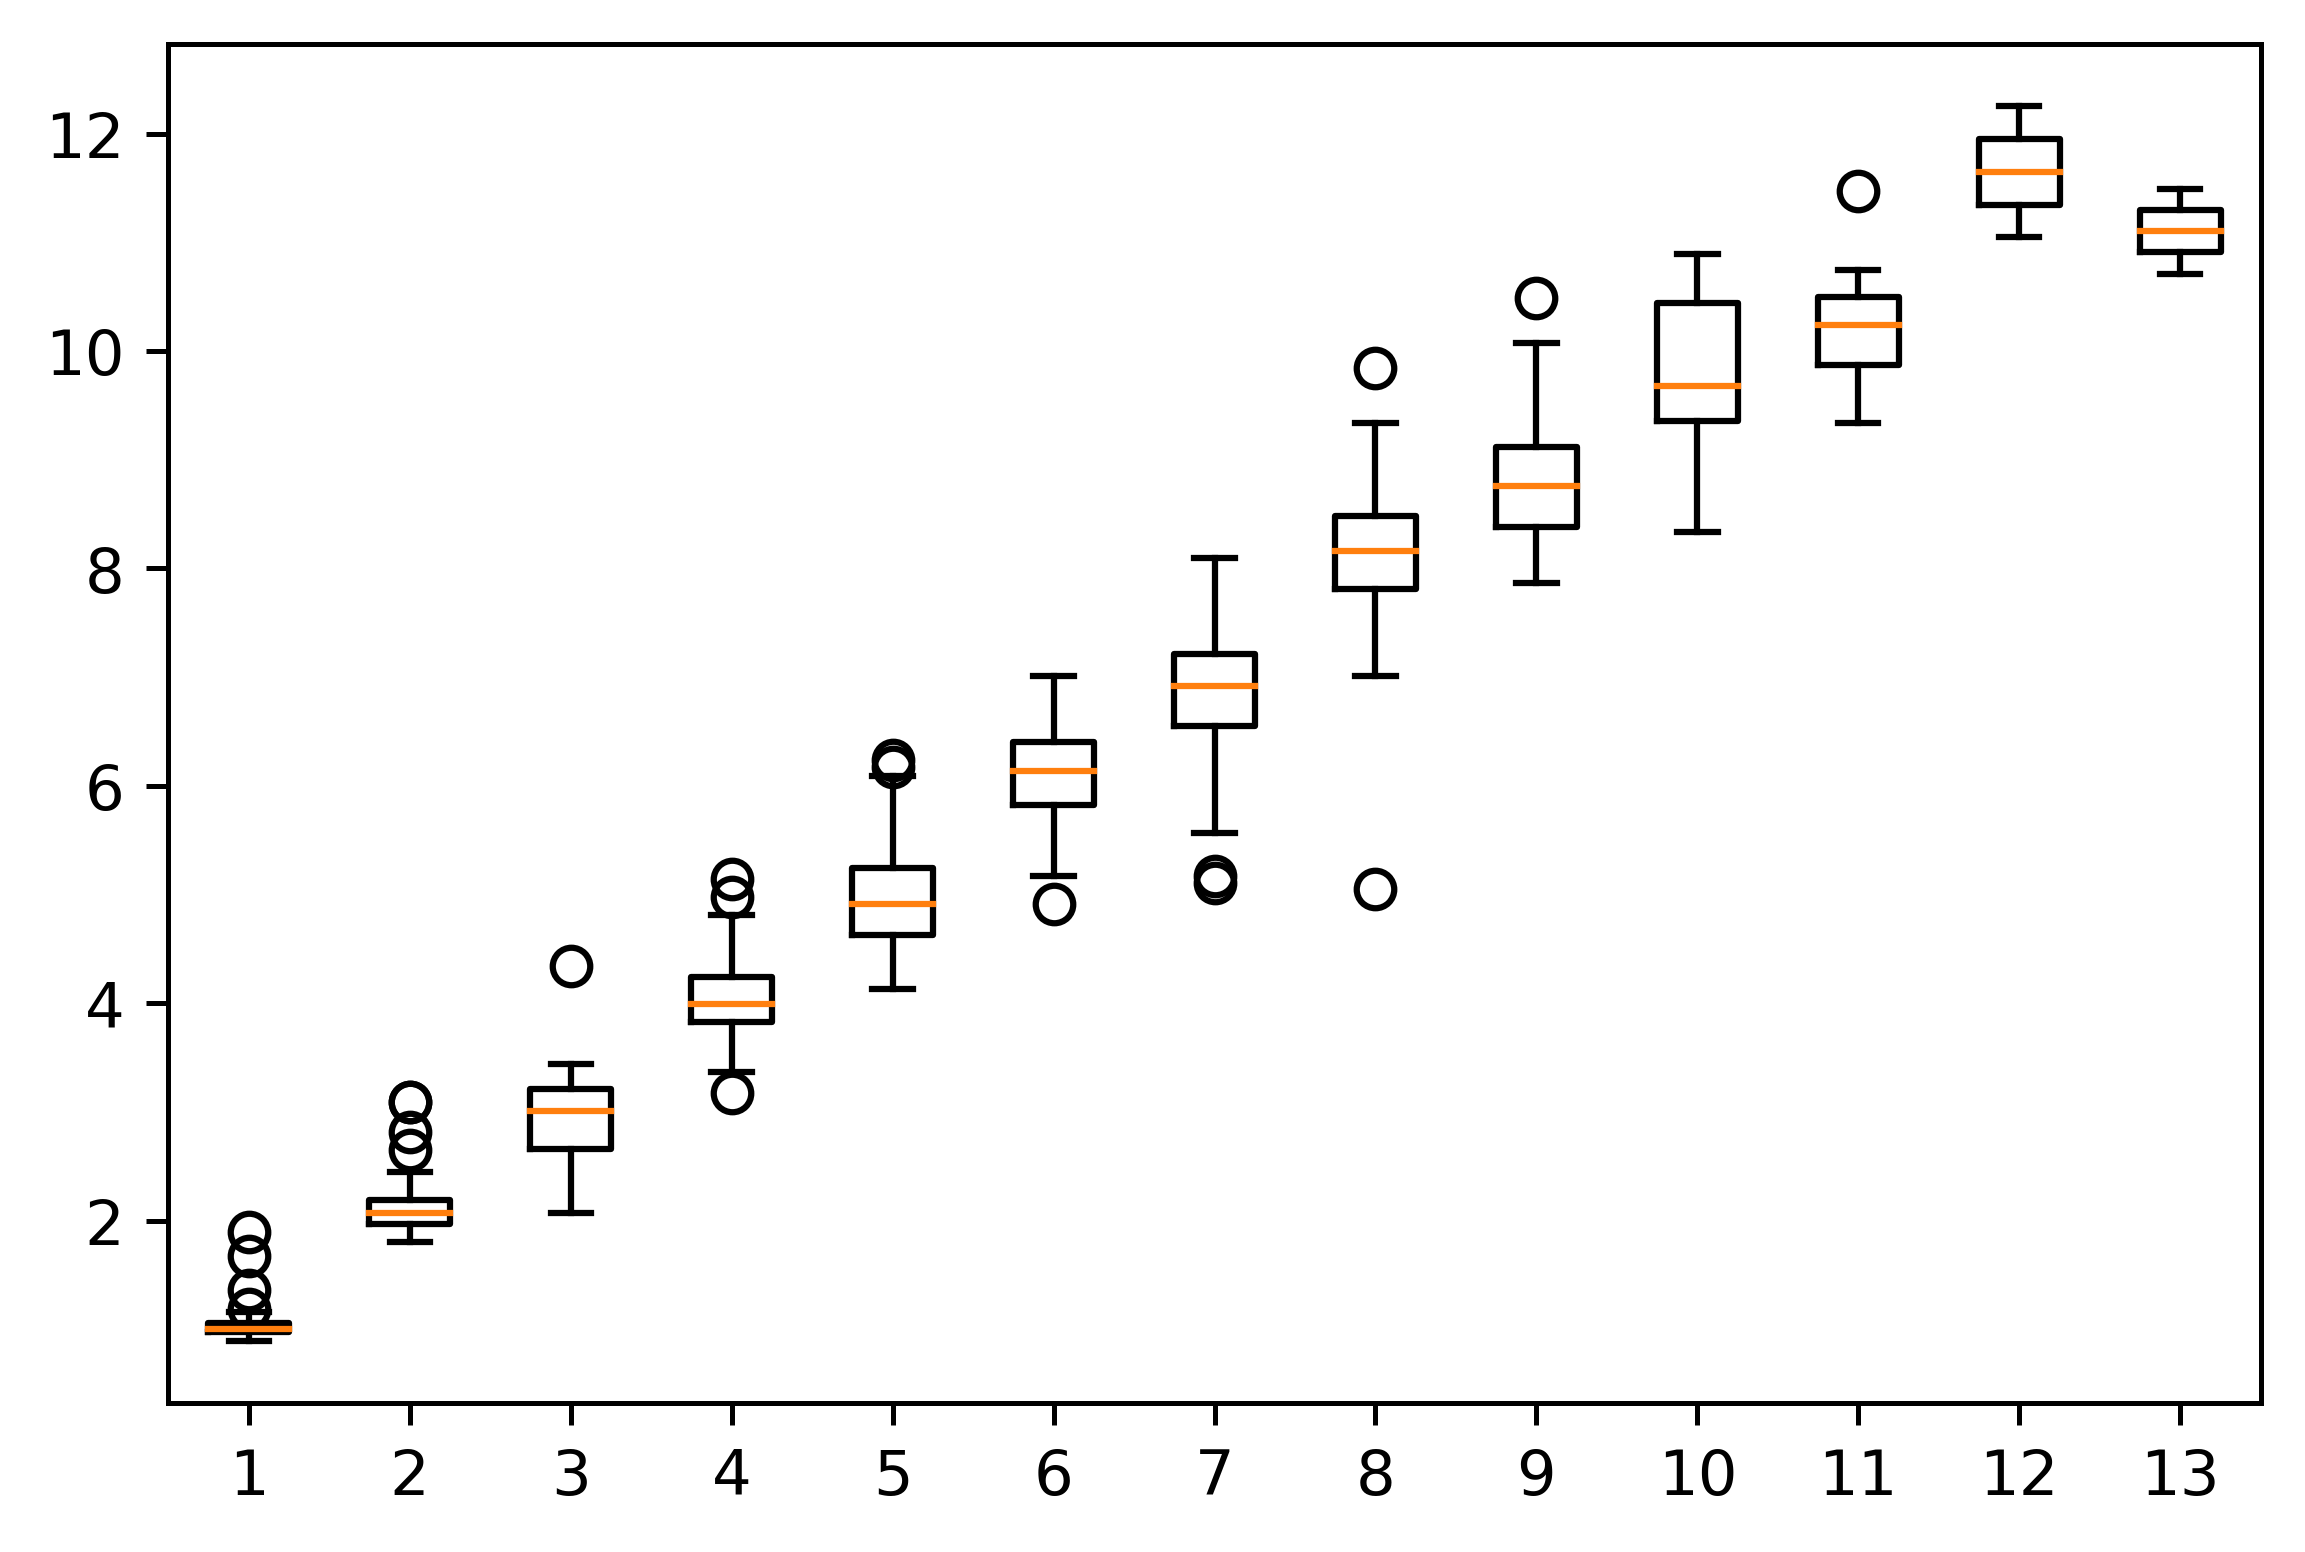

In [5]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()


### Residual plot per age group

The predictions show heteroskedasticity:
heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

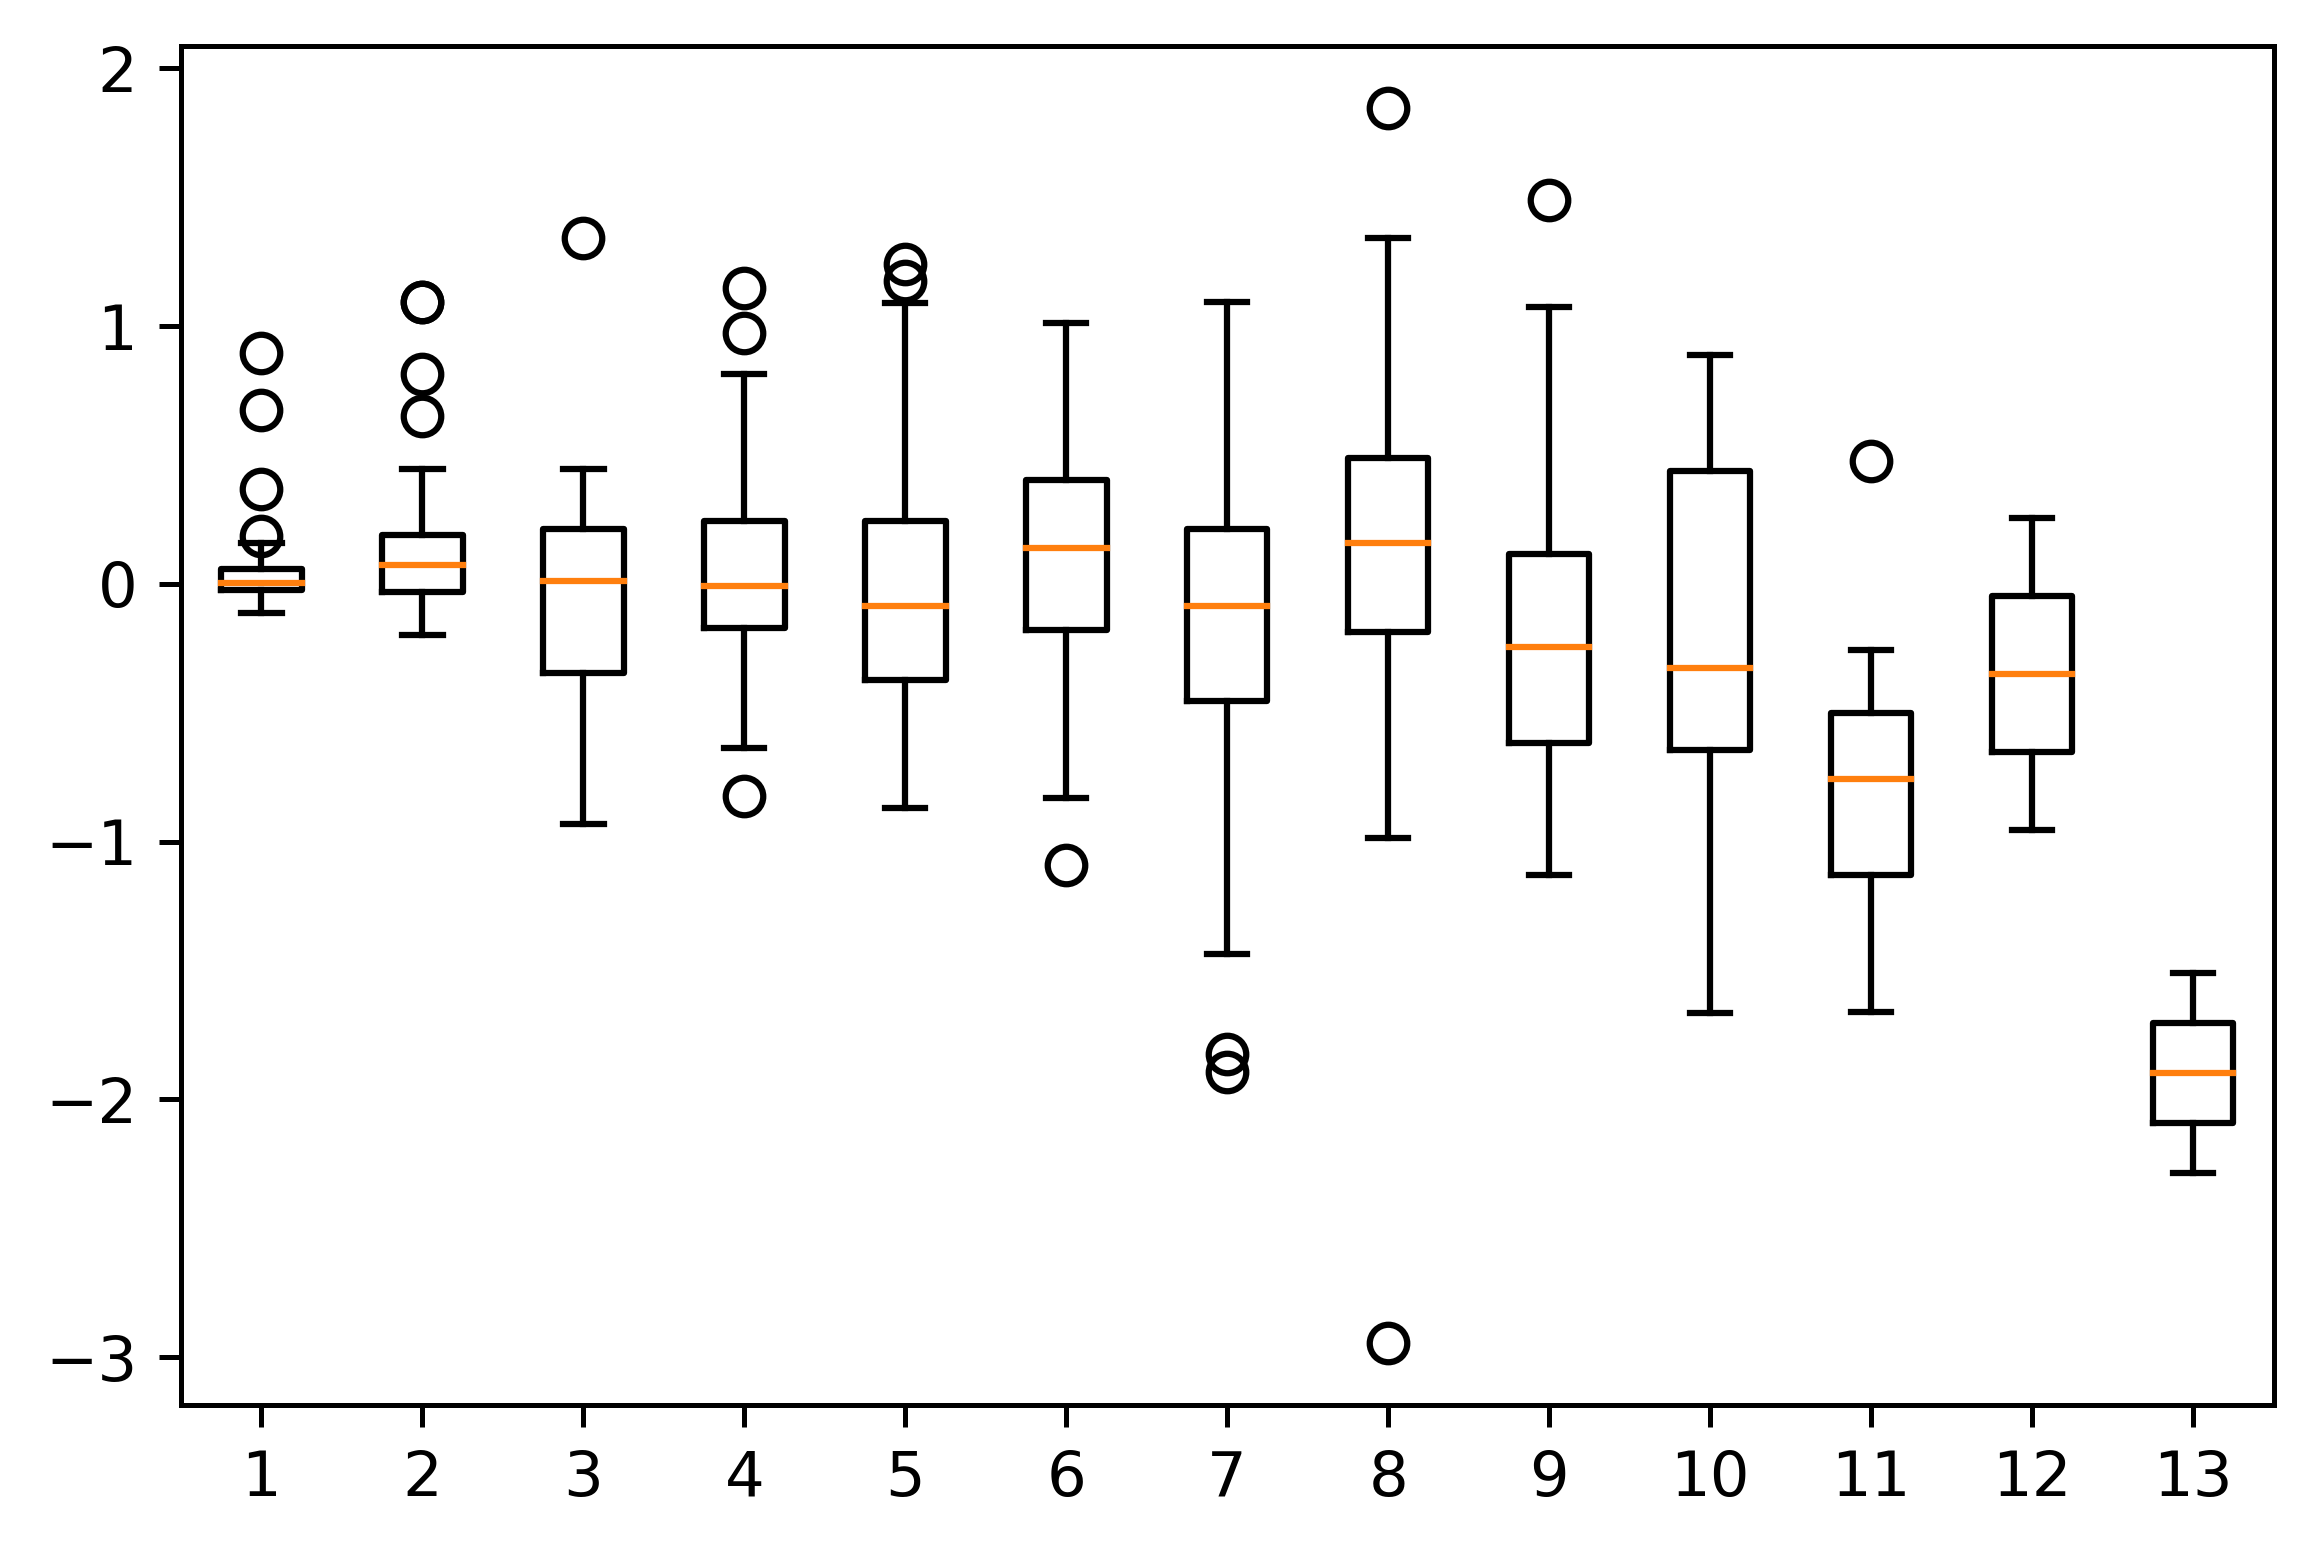

In [6]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

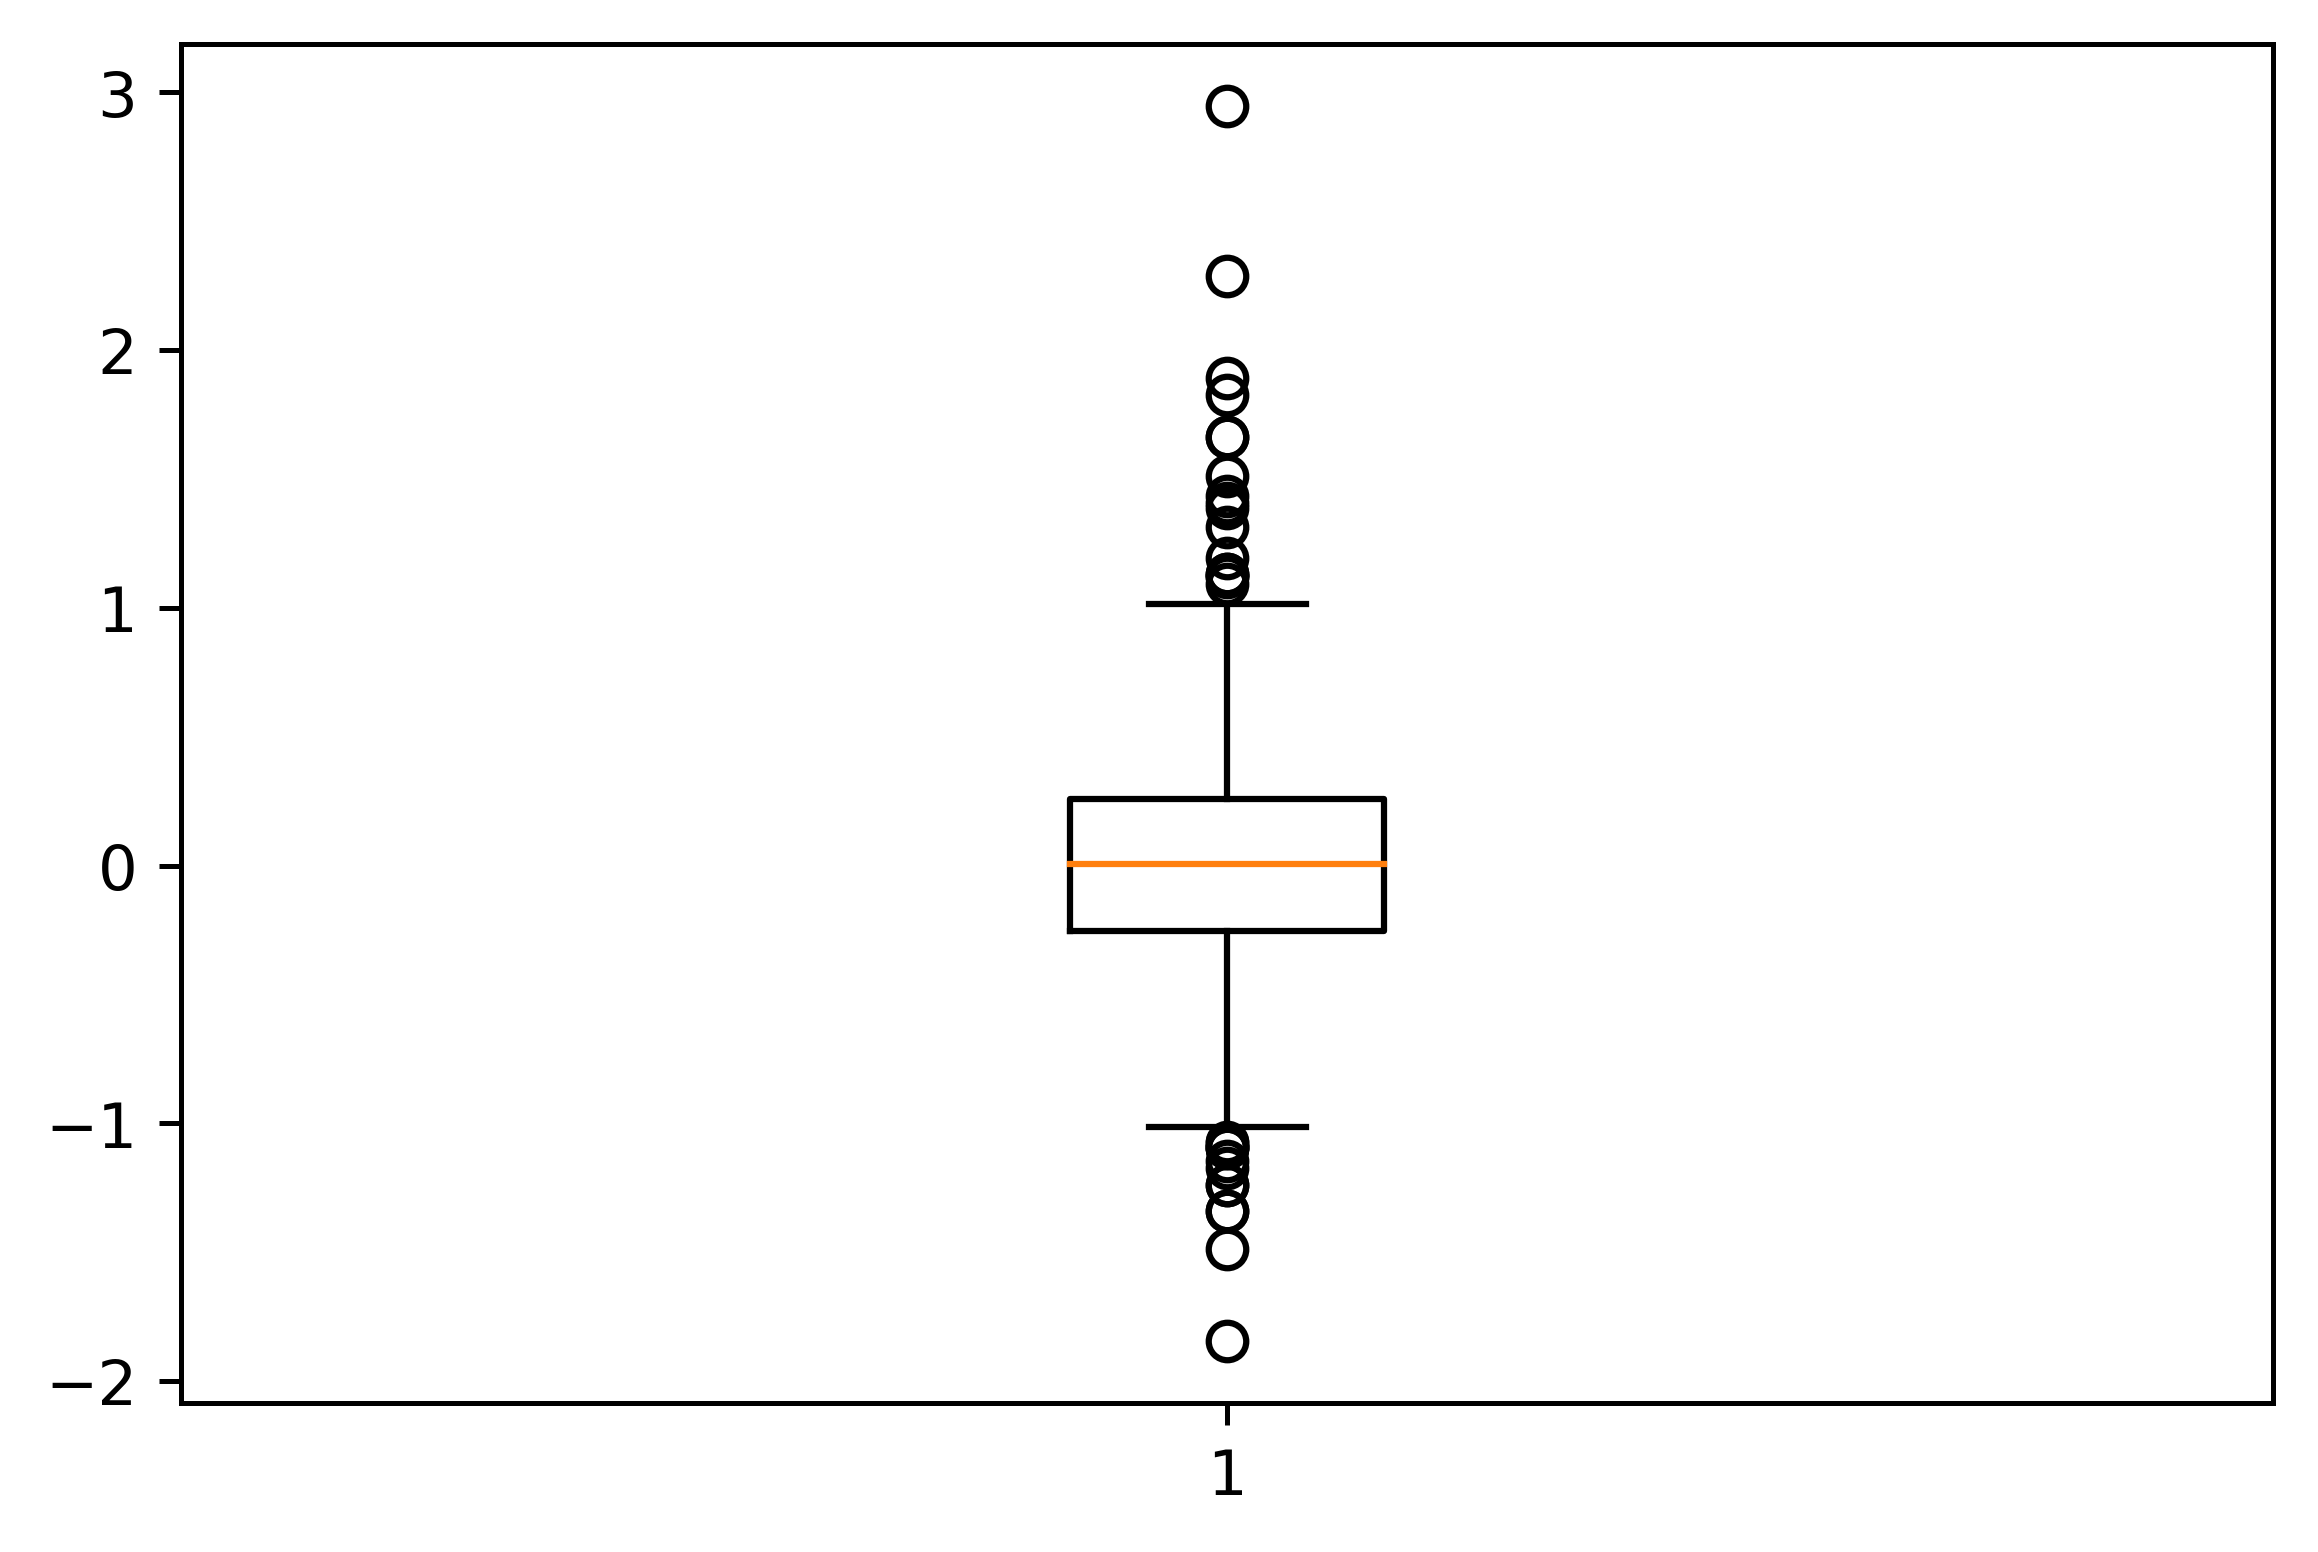

,0
count,515.000000
mean,0.023513
std,0.528997
min,-1.846407
25%,-0.251888
50%,0.007185
75%,0.257548
max,2.947138


In [7]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

errors in [0.5, 1.5):  136
errors in [1.5, \inf): 8
Total missclassification errors:144


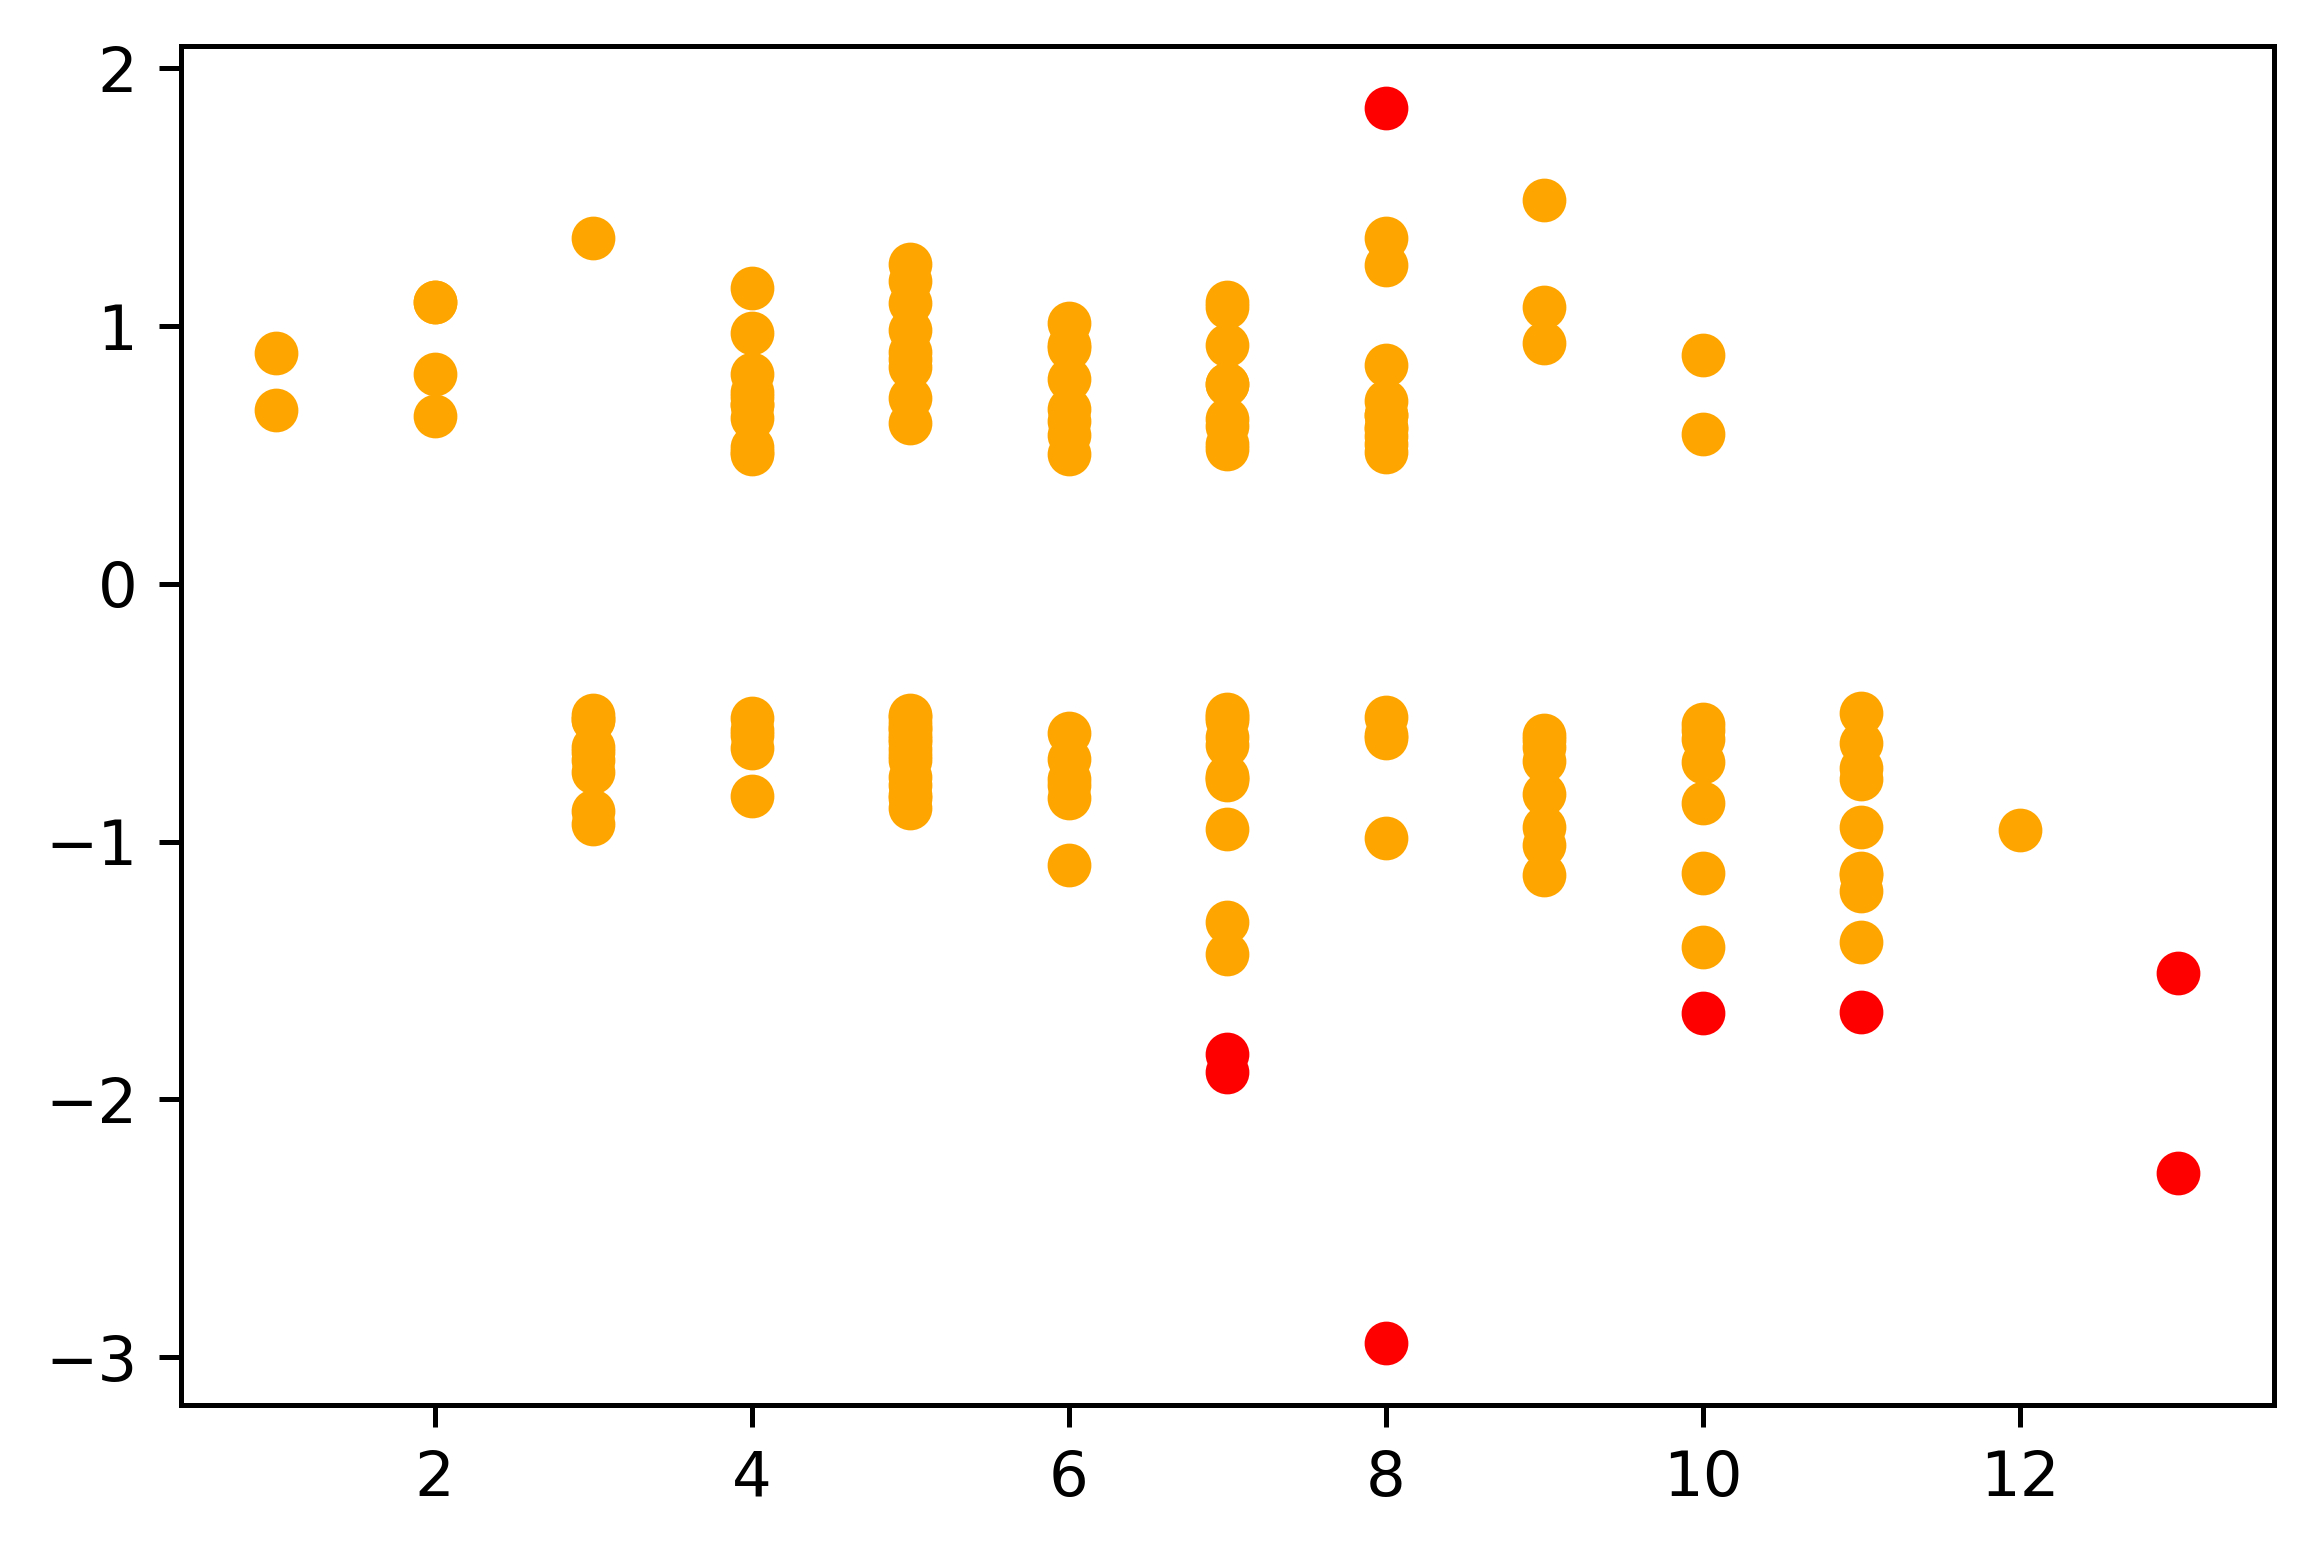

In [8]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()


### Excluding min/max prediction by fold pr prediction

In [9]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))
#0.7165048543689321 0.2812634011698365

aggregate accuracy, mse
0.7145631067961165 0.28771097750450764


### Outliers >= 1.5 years

In [10]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

5.107298803329468 7,71
5.17499623298645 7,362
9.846406745910645 8,279
5.05286169052124 8,423
8.336004304885865 10,369
9.338729095458984 11,312
11.489707660675048 13,92
10.713191509246826 13,342
